In [1]:
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

2024-08-11 23:09:07.158362: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-11 23:09:07.191408: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-11 23:09:07.438750: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-11 23:09:07.687433: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-11 23:09:07.881436: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [10]:
!unzip fruits-360_dataset_100x100.zip

Archive:  fruits-360_dataset_100x100.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of fruits-360_dataset_100x100.zip or
        fruits-360_dataset_100x100.zip.zip, and cannot find fruits-360_dataset_100x100.zip.ZIP, period.


In [2]:
ls

'Computer_Vision_HW(done_).ipynb'
 Fruits/
 Image_Classification_and_Transfer_Learning.ipynb
 fruits-360/
 fruits-360_dataset_100x100.zip
 reduced_fruits_360/


In [3]:
base_dir = 'fruits-360/'
train_dir = os.path.join(base_dir, 'Training')
test_dir = os.path.join(base_dir, 'Test')
image_size = (100, 100)
batch_size = 32


In [4]:
import os

base_dir = 'fruits-360/'
train_dir = os.path.join(base_dir, 'Training')

# Verify if the directory exists
if not os.path.exists(train_dir):
    print(f"Directory {train_dir} does not exist.")
else:
    print(f"Directory {train_dir} exists.")


Directory fruits-360/Training does not exist.


In [5]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = 'fruits-360/'
train_dir = os.path.join(base_dir, 'Training')
image_size = (100, 100)
batch_size = 32

# Check if the directory exists
if not os.path.exists(train_dir):
    print(f"Directory {train_dir} does not exist.")
else:
    print(f"Directory {train_dir} exists.")
    print("Contents of the directory:")
    print(os.listdir(train_dir))

    # Create ImageDataGenerator and flow_from_directory
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )


Directory fruits-360/Training does not exist.


In [6]:
import os

base_dir ="fruits-360/"
print("Contents of base directory:")
print(os.listdir(base_dir))


Contents of base directory:
['Test', 'LICENSE', 'readme.md']


In [4]:
import os

# Exact path to the Test directory
test_dir = "fruits-360/Test"

# Verify if the directory exists and print its contents
if os.path.exists(test_dir):
    print("Contents of the test directory:")
    print(os.listdir(test_dir))
else:
    print(f"Directory {test_dir} does not exist.")


Contents of the test directory:
['Cucumber Ripe 1', 'Clementine 1', 'Cherry Wax Black 1', 'Apple Red 2', 'Blueberry 1', 'Banana 1', 'Apple Golden 3', 'Cocos 1', 'Apple Pink Lady 1', 'Carrot 1', 'Apple Braeburn 1', 'Avocado ripe 1', 'Apple Crimson Snow 1', 'Cherry Wax Yellow 1', 'Grape White 2', 'Fig 1', 'Apple hit 1', 'Cherry 1', 'Cucumber 3', 'Cucumber 1', 'Granadilla 1', 'Grapefruit Pink 1', 'Ginger Root 1', 'Apple Golden 1', 'Eggplant 1', 'Cactus fruit 1', 'Apple 6', 'Corn 1', 'Avocado 1', 'Grape White 4', 'Cherry Rainier 1', 'Grapefruit White 1', 'Cantaloupe 1', 'Cucumber Ripe 2', 'Apple Red Yellow 1', 'Apricot 1', 'Guava 1', 'Carambula 1', 'Dates 1', 'Apple Red 3', 'Apple Red Yellow 2', 'Cherry Wax Red 1', 'Chestnut 1', 'Apple Granny Smith 1', 'Corn Husk 1', 'Banana Red 1', 'Banana Lady Finger 1', 'Cantaloupe 2', 'Cauliflower 1', 'Grape Blue 1', 'Cherry 2', 'Apple Golden 2', 'Grape Pink 1', 'Grape White 1', 'Grape White 3', 'Eggplant long 1', 'Apple Red 1', 'Apple Red Delicious 1'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from the test directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

# Example: Print the number of batches and class labels
print(f"Number of test batches: {len(test_generator)}")
print("Class labels:")
print(test_generator.class_indices)


Found 9569 images belonging to 60 classes.
Number of test batches: 300
Class labels:
{'Apple 6': 0, 'Apple Braeburn 1': 1, 'Apple Crimson Snow 1': 2, 'Apple Golden 1': 3, 'Apple Golden 2': 4, 'Apple Golden 3': 5, 'Apple Granny Smith 1': 6, 'Apple Pink Lady 1': 7, 'Apple Red 1': 8, 'Apple Red 2': 9, 'Apple Red 3': 10, 'Apple Red Delicious 1': 11, 'Apple Red Yellow 1': 12, 'Apple Red Yellow 2': 13, 'Apple hit 1': 14, 'Apricot 1': 15, 'Avocado 1': 16, 'Avocado ripe 1': 17, 'Banana 1': 18, 'Banana Lady Finger 1': 19, 'Banana Red 1': 20, 'Beetroot 1': 21, 'Blueberry 1': 22, 'Cabbage white 1': 23, 'Cactus fruit 1': 24, 'Cantaloupe 1': 25, 'Cantaloupe 2': 26, 'Carambula 1': 27, 'Carrot 1': 28, 'Cauliflower 1': 29, 'Cherry 1': 30, 'Cherry 2': 31, 'Cherry Rainier 1': 32, 'Cherry Wax Black 1': 33, 'Cherry Wax Red 1': 34, 'Cherry Wax Yellow 1': 35, 'Chestnut 1': 36, 'Clementine 1': 37, 'Cocos 1': 38, 'Corn 1': 39, 'Corn Husk 1': 40, 'Cucumber 1': 41, 'Cucumber 3': 42, 'Cucumber Ripe 1': 43, 'Cucu

In [6]:
import os
import shutil
from sklearn.utils import shuffle

def limit_images_and_classes(source_dir, dest_dir, max_images_per_class=100, classes_to_keep=5):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)
    
    class_names = os.listdir(source_dir)
    selected_classes = class_names[:classes_to_keep]  # Select the first 'classes_to_keep' classes
    
    for class_name in selected_classes:
        class_path = os.path.join(source_dir, class_name)
        if not os.path.isdir(class_path):
            continue
        
        # Create class directory in destination
        dest_class_path = os.path.join(dest_dir, class_name)
        if not os.path.exists(dest_class_path):
            os.makedirs(dest_class_path)
        
        # List all images in the class directory
        images = os.listdir(class_path)
        images = shuffle(images)  # Shuffle to ensure random sampling
        images_to_copy = images[:max_images_per_class]
        
        # Copy selected images to the new directory
        for image_name in images_to_copy:
            src = os.path.join(class_path, image_name)
            dst = os.path.join(dest_class_path, image_name)
            shutil.copyfile(src, dst)


In [7]:
source_dir = 'fruits-360/Test'
dest_dir = 'reduced_fruits_360/Test'
limit_images_and_classes(source_dir, dest_dir, max_images_per_class=100, classes_to_keep=5)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for the reduced dataset
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from the reduced directory
test_generator = test_datagen.flow_from_directory(
    dest_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

# Example: Print the number of batches and class labels
print(f"Number of test batches: {len(test_generator)}")
print("Class labels:")
print(test_generator.class_indices)


Found 613 images belonging to 6 classes.
Number of test batches: 20
Class labels:
{'.ipynb_checkpoints': 0, 'Apple Red 2': 1, 'Blueberry 1': 2, 'Cherry Wax Black 1': 3, 'Clementine 1': 4, 'Cucumber Ripe 1': 5}


In [9]:
import os

# Define the path to the parent directory
parent_dir = 'fruits-360/Test/Apple 6'

# List the contents of the parent directory
print("Contents of parent directory:")
print(os.listdir(parent_dir))


Contents of parent directory:
['r1_159_100.jpg', 'r0_211_100.jpg', 'r1_63_100.jpg', 'r1_39_100.jpg', 'r0_47_100.jpg', 'r0_163_100.jpg', 'r0_275_100.jpg', 'r0_299_100.jpg', 'r0_43_100.jpg', 'r0_11_100.jpg', 'r1_107_100.jpg', 'r1_131_100.jpg', 'r0_139_100.jpg', 'r0_259_100.jpg', 'r1_215_100.jpg', 'r1_279_100.jpg', 'r1_275_100.jpg', 'r0_135_100.jpg', 'r0_295_100.jpg', 'r0_63_100.jpg', 'r1_163_100.jpg', 'r0_15_100.jpg', 'r1_35_100.jpg', 'r0_19_100.jpg', 'r1_271_100.jpg', 'r0_23_100.jpg', 'r0_203_100.jpg', 'r1_19_100.jpg', 'r1_307_100.jpg', 'r0_59_100.jpg', 'r0_131_100.jpg', 'r1_71_100.jpg', 'r0_99_100.jpg', 'r1_67_100.jpg', 'r1_47_100.jpg', 'r1_175_100.jpg', 'r0_315_100.jpg', 'r1_127_100.jpg', 'r1_255_100.jpg', 'r0_231_100.jpg', 'r1_211_100.jpg', 'r1_43_100.jpg', 'r1_243_100.jpg', 'r0_147_100.jpg', 'r1_27_100.jpg', 'r1_79_100.jpg', 'r1_251_100.jpg', 'r1_75_100.jpg', 'r1_139_100.jpg', 'r1_303_100.jpg', 'r0_247_100.jpg', 'r1_259_100.jpg', 'r1_115_100.jpg', 'r1_187_100.jpg', 'r0_67_100.jpg', 

In [10]:
# Check the specific directory
apple_dir = 'reduced_fruits_360/Test/Apple Red 2'

if os.path.exists(apple_dir):
    print("Contents of Apple Red 2 directory:")
    print(os.listdir(apple_dir))
else:
    print(f"Directory {apple_dir} does not exist.")


Contents of Apple Red 2 directory:
['81_100.jpg', 'r_94_100.jpg', 'r_91_100.jpg', '55_100.jpg', '89_100.jpg', '97_100.jpg', '67_100.jpg', 'r_47_100.jpg', 'r_32_100.jpg', 'r_48_100.jpg', 'r_9_100.jpg', '98_100.jpg', '72_100.jpg', 'r_4_100.jpg', '61_100.jpg', '85_100.jpg', 'r_46_100.jpg', 'r_327_100.jpg', 'r_41_100.jpg', '49_100.jpg', 'r_87_100.jpg', '43_100.jpg', '38_100.jpg', 'r_83_100.jpg', 'r_63_100.jpg', '82_100.jpg', '325_100.jpg', '9_100.jpg', 'r_80_100.jpg', 'r_8_100.jpg', 'r_326_100.jpg', 'r_66_100.jpg', '99_100.jpg', '79_100.jpg', '70_100.jpg', '3_100.jpg', 'r_81_100.jpg', 'r_88_100.jpg', '91_100.jpg', 'r_321_100.jpg', 'r_6_100.jpg', '41_100.jpg', '63_100.jpg', 'r_76_100.jpg', 'r_35_100.jpg', 'r_74_100.jpg', '47_100.jpg', '53_100.jpg', '59_100.jpg', 'r_60_100.jpg', 'r_52_100.jpg', 'r_99_100.jpg', '83_100.jpg', 'r_324_100.jpg', '44_100.jpg', '88_100.jpg', '95_100.jpg', '56_100.jpg', 'r_79_100.jpg', 'r_57_100.jpg', '92_100.jpg', 'r_93_100.jpg', '321_100.jpg', 'r_98_100.jpg', '51_

In [11]:
# Define the path to the directory with images
apple_dir = 'reduced_fruits_360/Test/Apple Red 2'

# Verify if the directory exists
if os.path.exists(apple_dir):
    print("Contents of the Apple Red 2 directory:")
    images = [os.path.join(apple_dir, fname) for fname in os.listdir(apple_dir) if fname.lower().endswith(('.png', '.jpg', '.jpeg'))]
    print(f"Found {len(images)} images.")
else:
    print(f"Directory {apple_dir} does not exist.")


Contents of the Apple Red 2 directory:
Found 163 images.


where the 1st images appear...

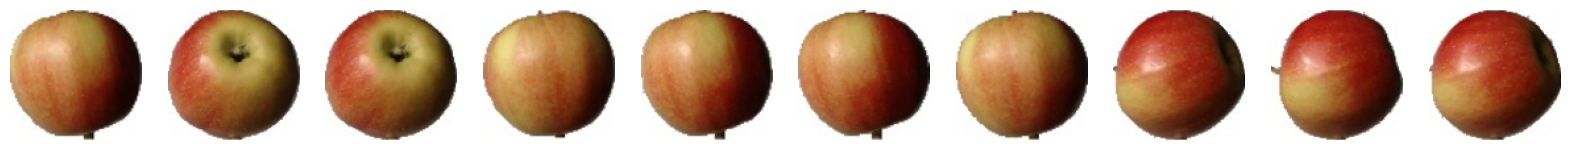

In [12]:
import matplotlib.pyplot as plt
from PIL import Image

# Function to load and display images
def load_and_display_images(image_paths, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
    for ax, img_path in zip(axes, image_paths[:num_images]):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')
    plt.show()

# Display a few images from the directory
if 'images' in locals() and images:
    load_and_display_images(images)
else:
    print("No images found to display.")


In [13]:
# Define the path to the directory with images
blueberry_dir = 'reduced_fruits_360/Test/Blueberry 1'

# Verify if the directory exists
if os.path.exists(blueberry_dir):
    print("Contents of the Blueberry 1 directory:")
    images_bb = [os.path.join(blueberry_dir, fname) for fname in os.listdir(blueberry_dir) if fname.lower().endswith(('.png', '.jpg', '.jpeg'))]
    print(f"Found {len(images_bb)} images.")
else:
    print(f"Directory {blueberry_dir} does not exist.")

Contents of the Blueberry 1 directory:
Found 150 images.


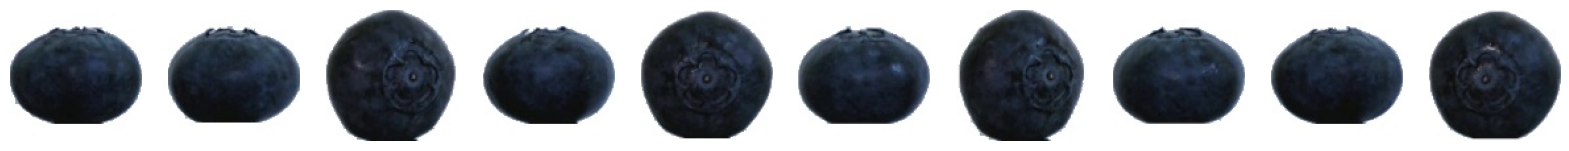

In [14]:
import matplotlib.pyplot as plt
from PIL import Image

# Function to load and display images
def load_and_display_images(image_paths, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
    for ax, img_path in zip(axes, image_paths[:num_images]):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')
    plt.show()

# Display a few images from the directory
if 'images' in locals() and images:
    load_and_display_images(images_bb)
else:
    print("No images found to display.")

In [15]:
### Train Base Model Section

In [22]:
import os
import shutil
import random

def split_data(source_dir, train_dir, test_dir, train_ratio=0.8):
    # Create directories if they don't exist
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    for class_name in os.listdir(source_dir):
        class_dir = os.path.join(source_dir, class_name)
        if not os.path.isdir(class_dir):
            continue

        # Create class directories in train and test directories
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

        # Get all images in the class directory
        images = os.listdir(class_dir)
        random.shuffle(images)

        # Determine the split index
        split_index = int(len(images) * train_ratio)
        
        # Move images to train and test directories
        for i, image_name in enumerate(images):
            src_path = os.path.join(class_dir, image_name)
            dest_dir = train_dir if i < split_index else test_dir
            dest_path = os.path.join(dest_dir, class_name, image_name)
            
            # Check if the file already exists at destination
            if not os.path.exists(dest_path):
                shutil.copy(src_path, dest_path)
            else:
                print(f"Skipped {image_name} as it already exists in {dest_dir}")

# Paths to directories
source_dir = 'reduced_fruits_360/Test'
train_dir = 'reduced_fruits_360/Train'
test_dir = 'reduced_fruits_360/Test'

split_data(source_dir, train_dir, test_dir)


Skipped 47_100.jpg as it already exists in reduced_fruits_360/Test
Skipped 187_100.jpg as it already exists in reduced_fruits_360/Test
Skipped 211_100.jpg as it already exists in reduced_fruits_360/Test
Skipped r_160_100.jpg as it already exists in reduced_fruits_360/Test
Skipped 195_100.jpg as it already exists in reduced_fruits_360/Test
Skipped r_201_100.jpg as it already exists in reduced_fruits_360/Test
Skipped 190_100.jpg as it already exists in reduced_fruits_360/Test
Skipped 201_100.jpg as it already exists in reduced_fruits_360/Test
Skipped 218_100.jpg as it already exists in reduced_fruits_360/Test
Skipped 55_100.jpg as it already exists in reduced_fruits_360/Test
Skipped r_166_100.jpg as it already exists in reduced_fruits_360/Test
Skipped r_204_100.jpg as it already exists in reduced_fruits_360/Test
Skipped r_125_100.jpg as it already exists in reduced_fruits_360/Test
Skipped 223_100.jpg as it already exists in reduced_fruits_360/Test
Skipped r_120_100.jpg as it already exis

In [17]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define image size and batch size
image_size = (224, 224)
batch_size = 10

# Load training dataset
train_ds = image_dataset_from_directory(
    "reduced_fruits_360/Train",
    image_size=image_size,
    batch_size=batch_size,
    label_mode='binary'  
)

# Load testing dataset
test_ds = image_dataset_from_directory(
    "reduced_fruits_360/Test",
    image_size=image_size,
    batch_size=batch_size,
    label_mode='binary'  
)

# Example of displaying dataset information
print(f"Number of training batches: {len(train_ds)}")
print(f"Number of testing batches: {len(test_ds)}")
print("Class labels for training dataset:")
print(train_ds.class_names)
print("Class labels for testing dataset:")
print(test_ds.class_names)


Found 292 files belonging to 2 classes.
Found 313 files belonging to 2 classes.
Number of training batches: 30
Number of testing batches: 32
Class labels for training dataset:
['Apple Red 2', 'Blueberry 1']
Class labels for testing dataset:
['Apple Red 2', 'Blueberry 1']


Number of images loaded: 313
Number of labels loaded: 313


2024-08-11 23:12:01.231436: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-08-11 23:12:01.293288: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Number of batches in train_ds: 10
Number of batches in val_ds: 0


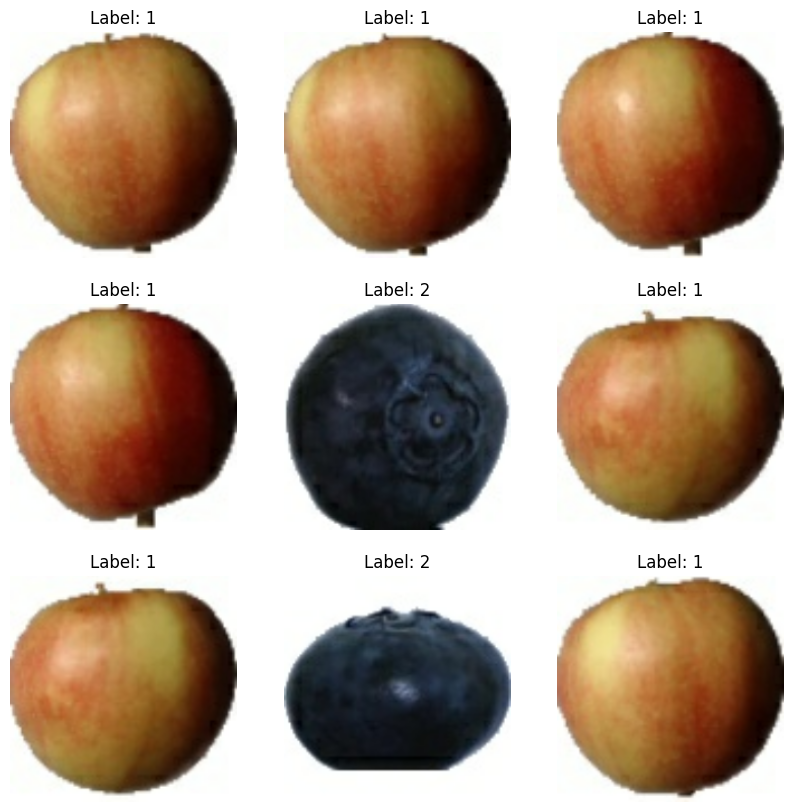

In [18]:
import tensorflow as tf
import os
import numpy as np

# Define paths and parameters
data_dir = 'reduced_fruits_360/Test'
image_size = (224, 224)
batch_size = 32

# Function to load and preprocess images
def load_image(image_path):
    try:
        image = tf.io.read_file(image_path)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, image_size)
        image = image / 255.0  # Normalize the image to [0, 1]
        return image
    except tf.errors.InvalidArgumentError:
        print(f"Skipping corrupted file: {image_path}")
        return None

# Function to load and preprocess dataset from directory
def load_data_from_directory(directory):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))
    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = load_image(image_path)
            if image is not None:
                images.append(image)
                labels.append(label)
    return images, labels, class_names

# Load the data
images, labels, class_names = load_data_from_directory(data_dir)

# Convert lists to tensors
images = tf.convert_to_tensor(images, dtype=tf.float32)
labels = tf.convert_to_tensor(labels, dtype=tf.int32)

# Create dataset from tensors
dataset = tf.data.Dataset.from_tensor_slices((images, labels))
dataset = dataset.shuffle(buffer_size=len(images)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

# Split dataset
split_index = int(len(images) * 0.8)
train_ds = dataset.take(split_index)
val_ds = dataset.skip(split_index)

# Print dataset information
print(f"Number of images loaded: {len(images)}")
print(f"Number of labels loaded: {len(labels)}")
print(f"Number of batches in train_ds: {len(list(train_ds))}")
print(f"Number of batches in val_ds: {len(list(val_ds))}")

# Iterate and visualize a sample batch from train_ds
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(min(9, len(images))):  # Ensure there are at least 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")

plt.show()


In [29]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Load the base model with pre-trained weights
base_model1 = ResNet50(input_shape=image_size + (3,), include_top=False, weights='imagenet')
base_model1.trainable = False  # Freeze the base model

# Create a new model on top
model1 = models.Sequential([
    base_model1,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  # 2 classes
])

# Compile the model
model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Train the model
history1 = model1.fit(train_ds, validation_data=test_ds, epochs=10)

# Save the trained model
model1.save('model1.keras')


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - accuracy: 0.8527 - loss: 0.3377 - val_accuracy: 1.0000 - val_loss: 2.3096e-04
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 8.9847e-06
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 1.0000 - loss: 2.7649e-04 - val_accuracy: 1.0000 - val_loss: 2.1404e-06
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 1.0000 - loss: 7.8300e-05 - val_accuracy: 1.0000 - val_loss: 1.0009e-06
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 1.0000 - loss: 1.7385e-04 - val_accuracy: 1.0000 - val_loss: 6.6498e-07
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 1.0000 - loss: 9.2882e-05 - val_accuracy: 1.0000 - val_loss: 5.0274e-07
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 1.0000 - loss: 2.6521e-04 - val_accuracy: 1.0000 - val_loss: 3.2259e-07
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 94s 13s/step - accuracy: 1.0000 - loss: 1.8158e-

In [30]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models

base_model2 = DenseNet121(input_shape=image_size + (3,), include_top=False, weights='imagenet')
base_model2.trainable = False  

model2 = models.Sequential([
    base_model2,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  # 2 classes
])


model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Train the model
history2 = model2.fit(train_ds, validation_data=test_ds, epochs=10)

# Save it
model2.save('model2.keras')


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 77s 6s/step - accuracy: 0.6472 - loss: 3.7394 - val_accuracy: 1.0000 - val_loss: 3.5321e-05
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.9705 - loss: 0.0858 - val_accuracy: 1.0000 - val_loss: 3.8467e-08
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.9936 - loss: 0.0092 - val_accuracy: 1.0000 - val_loss: 1.1388e-07
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.9901 - loss: 0.0150 - val_accuracy: 1.0000 - val_loss: 2.3613e-08
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 1.0000 - loss: 1.0026e-04 - val_accuracy: 1.0000 - val_loss: 8.3789e-09
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 1.0000 - loss: 3.3385e-04 - val_accuracy: 1.0000 - val_loss: 2.6660e-09
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 1.0000 - loss: 5.1830e-05 - val_accuracy: 1.0000 - val_loss: 1.5234e-09
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - accuracy: 1.0000 - loss: 2.0728e-05 - val_

In [ ]:
### Model Augmentation...

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


In [20]:
import tensorflow as tf

# Define paths
data_dir = 'reduced_fruits_360/Test'
image_size = (224, 224)
batch_size = 32

# Load the datasets without augmentation
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)

# Check if the datasets are loaded correctly
print("Number of batches in train_ds:", len(train_ds))
print("Number of batches in val_ds:", len(val_ds))


Found 313 files belonging to 2 classes.
Using 251 files for training.
Found 313 files belonging to 2 classes.
Using 62 files for validation.
Number of batches in train_ds: 8
Number of batches in val_ds: 2


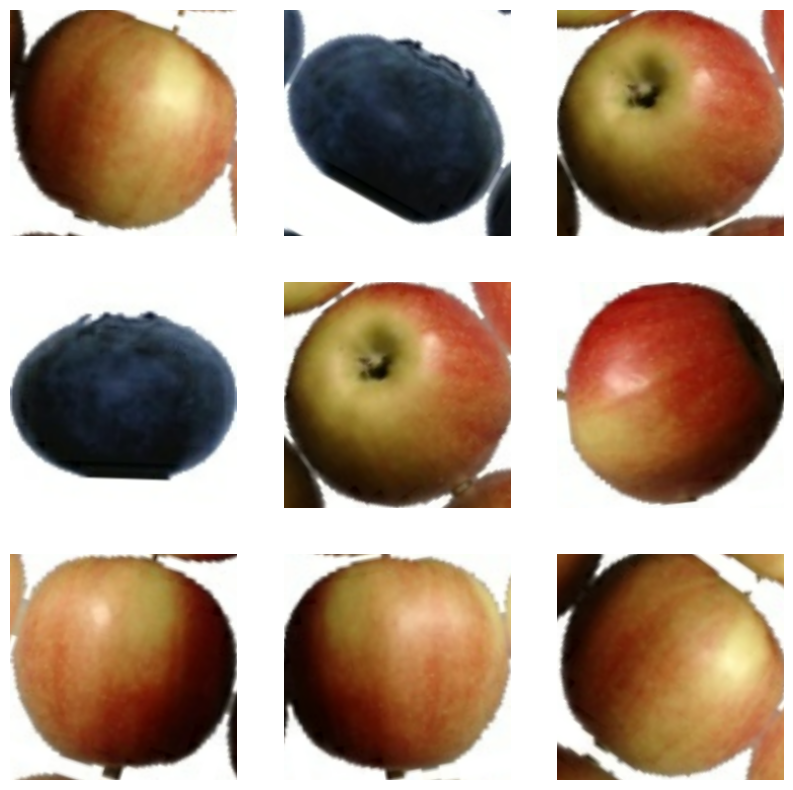

In [36]:
# Define data augmentation layers
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]

# Data augmentation function
def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

# Visualize augmented images
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[i]).astype("uint8"))
        plt.axis("off")
plt.show()

2024-08-11 23:12:48.198392: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


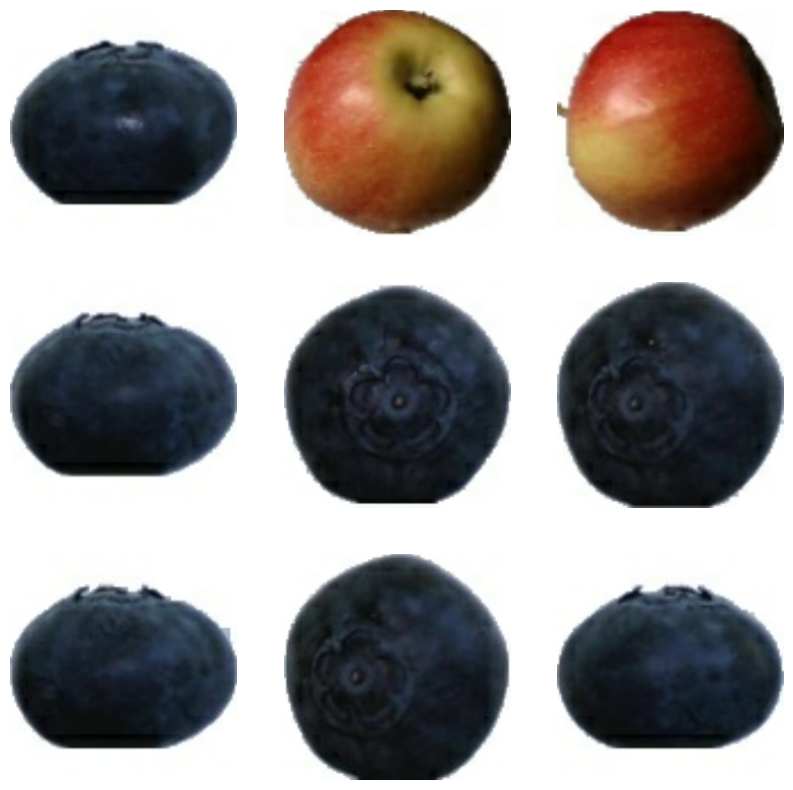

In [21]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
plt.show()


In [31]:
# Load the base model with pre-trained weights
base_model = tf.keras.applications.MobileNetV2(input_shape=image_size + (3,),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False  # Freeze the base model

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_ds.class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

# Save the trained model
model.save('augmented_fruits_model.keras')


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8537 - loss: 0.3280 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 673ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 8.8104e-05
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 515ms/step - accuracy: 1.0000 - loss: 0.0091 - val_accuracy: 1.0000 - val_loss: 3.0976e-05
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 572ms/step - accuracy: 1.0000 - loss: 2.1386e-04 - val_accuracy: 1.0000 - val_loss: 2.0948e-05
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 543ms/step - accuracy: 1.0000 - loss: 2.5203e-04 - val_accuracy: 1.0000 - val_loss: 1.5797e-05
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 574ms/step - accuracy: 1.0000 - loss: 2.5736e-04 - val_accuracy: 1.0000 - val_loss: 1.1744e-05
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 542ms/step - accuracy: 1.0000 - loss: 1.2973e-04 - val_accuracy: 1.0000 - val_loss: 9.6385e-06
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 530ms/step - accuracy: 1.0000 - loss: 1.2

In [ ]:
### comparing augmentations...

In [2]:
import tensorflow as tf
from tensorflow.keras import layers


2024-08-12 00:33:38.481720: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-12 00:33:38.541478: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-12 00:33:38.941785: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-12 00:33:39.255906: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-12 00:33:39.555721: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define and compile models
def create_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Conv2D(32, 3, activation='relu')(inputs)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return tf.keras.Model(inputs, outputs)

# Create models
model1 = create_model((224, 224, 3), 2)
model2 = create_model((224, 224, 3), 2)
model3 = create_model((224, 224, 3), 2)

# Save models
#model1.save('model1.keras')
#model2.save('model2.keras')
#model3.save('augmented_fruits_model.keras')

In [71]:
import tensorflow as tf
from tensorflow.keras import layers

# Define and compile models
def create_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Conv2D(32, 3, activation='relu')(inputs)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return tf.keras.Model(inputs, outputs)

# Create models with updated input shape
model1 = create_model((100, 100, 3), 2)
model2 = create_model((100, 100, 3), 2)
model3 = create_model((100, 100, 3), 2)

# Save models
model1.save('model1.keras')
model2.save('model2.keras')
model3.save('augmented_fruits_model.keras')


In [73]:
model1 = tf.keras.models.load_model('model1.keras')
print("Model 1 Summary:")
model1.summary()

Model 1 Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 76832)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     9,834,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,835,778 (37.52 MB)

 Trainable params: 9,835,778 (37.52 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model2 = tf.keras.models.load_model('model2.keras')
model3 = tf.keras.models.load_model('augmented_fruits_model.keras')

print("\nModel 2 Summary:")
model2.summary()

print("\nModel 3 Summary:")
model3.summary()



Model 2 Summary:


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 76832)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     9,834,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,835,778 (37.52 MB)

 Trainable params: 9,835,778 (37.52 MB)

 Non-trainable params: 0 (0.00 B)


Model 3 Summary:


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 76832)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     9,834,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,835,778 (37.52 MB)

 Trainable params: 9,835,778 (37.52 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
## ROC

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

image_size=(100,100)
batch_size=30

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'reduced_fruits_360/Train', 
    image_size=image_size,
    batch_size=batch_size,
    label_mode='int' 
)

# Optionally, normalize the dataset
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

Found 292 files belonging to 2 classes.


Found 292 files belonging to 2 classes.
(30, 100, 100, 3) (30,)


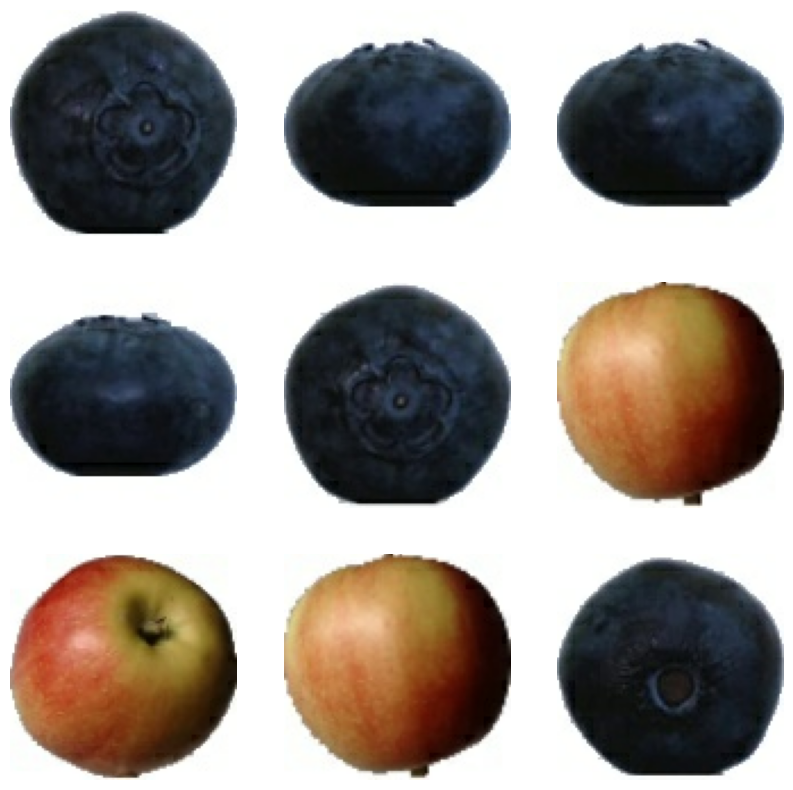

In [76]:
# Load the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'reduced_fruits_360/Train',
    image_size=image_size,
    batch_size=batch_size,
    label_mode='int'
)

# Take a batch and check its content
for images, labels in train_ds.take(1):
    print(images.shape, labels.shape)
    plt.figure(figsize=(10, 10))
    for i in range(min(9, images.shape[0])):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
    plt.show()


Found 292 files belonging to 2 classes.
Sample images shape: (32, 100, 100, 3)
Sample labels shape: (32,)


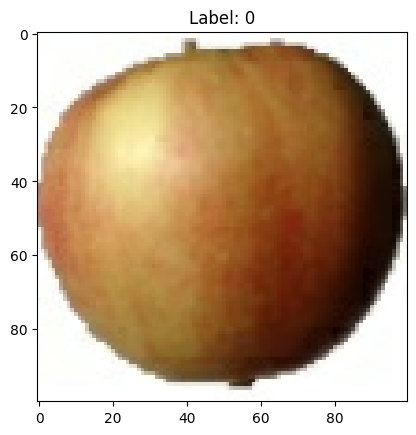

Batch of images shape: (32, 100, 100, 3)
Batch of labels shape: (32,)


In [77]:
import tensorflow as tf

# Load a small sample of the dataset
def load_sample_dataset(directory):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        image_size=(100, 100),  # Adjust to your image size
        batch_size=32,  # Adjust batch size if needed
        label_mode='int'
    )
    return dataset

# Path to your dataset directory
dataset_directory = 'reduced_fruits_360/Train'
sample_ds = load_sample_dataset(dataset_directory)

# Check dataset
for images, labels in sample_ds.take(1):
    print("Sample images shape:", images.shape)
    print("Sample labels shape:", labels.shape)
    # Print first image and label
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title(f"Label: {labels[0].numpy()}")
    plt.show()

# Ensure dataset is correctly iterating
for images, labels in sample_ds:
    print(f"Batch of images shape: {images.shape}")
    print(f"Batch of labels shape: {labels.shape}")
    break  # Check the first batch


In [78]:
# Ensure dataset is correctly iterating
for images, labels in sample_ds:
    print(f"Batch of images shape: {images.shape}")
    print(f"Batch of labels shape: {labels.shape}")
    break  # Check the first batch


Batch of images shape: (32, 100, 100, 3)
Batch of labels shape: (32,)


In [79]:
def load_and_split_dataset(directory, split_ratio=0.8):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        image_size=(100, 100),  # Replace with your image size
        batch_size=32,  # Adjust batch size if needed
        label_mode='int',
        validation_split=1 - split_ratio,
        subset='training',  # For training data
        seed=123  # Ensure reproducibility
    )

    val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        image_size=(100, 100),
        batch_size=32,
        label_mode='int',
        validation_split=1 - split_ratio,
        subset='validation',  # For validation data
        seed=123
    )
    return dataset, val_dataset

train_ds, val_ds = load_and_split_dataset(dataset_directory)

# Check the number of batches
print(f"Number of batches in train_ds: {len(list(train_ds))}")
print(f"Number of batches in val_ds: {len(list(val_ds))}")

# Check the number of samples in each dataset
train_size = int(0.8 * len(sample_ds))
val_size = len(sample_ds) - train_size

train_ds = sample_ds.take(train_size)
val_ds = sample_ds.skip(train_size)

print(f"Number of batches in train_ds: {len(list(train_ds))}")
print(f"Number of batches in val_ds: {len(list(val_ds))}")


Found 292 files belonging to 2 classes.
Using 234 files for training.
Found 292 files belonging to 2 classes.
Using 58 files for validation.


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input is empty.
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext] name: 

In [80]:
import os

# Convert to absolute path
dataset_directory = os.path.abspath('reduced_fruits_360')
print("Absolute path:", dataset_directory)


Absolute path: /root/Data 4380/Image Project HW/reduced_fruits_360


In [81]:
import tensorflow as tf

# Create a small test dataset
test_directory = 'reduced_fruits_360/Train'
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_directory,
    image_size=(100, 100),
    batch_size=32,
    label_mode='int'
)

# Check the test dataset
for images, labels in test_ds.take(1):
    print("Test images shape:", images.shape)
    print("Test labels shape:", labels.shape)


Found 292 files belonging to 2 classes.
Test images shape: (32, 100, 100, 3)
Test labels shape: (32,)


In [83]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Resize and rescale images
def resize_and_rescale(image, label, target_size=(224, 224)):
    image = tf.image.resize(image, target_size)
    return image, label

# Load and process dataset
def load_and_process_dataset(directory, image_size=(224, 224), batch_size=32):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        image_size=image_size,
        batch_size=batch_size,
        label_mode='int'
    )
    dataset = dataset.map(lambda x, y: resize_and_rescale(x, y, target_size=image_size))
    return dataset

# Define a function to compute ROC curve and AUC
def compute_roc_auc(model, dataset):
    y_true = []
    y_pred = []

    # Collect true labels and predictions
    for images, labels in dataset:
        predictions = model.predict(images, batch_size=32)
        y_true.extend(labels.numpy())
        y_pred.extend(predictions)

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # For multi-class classification, use one-hot encoding for true labels
    num_classes = y_pred.shape[1]
    y_true_one_hot = tf.keras.utils.to_categorical(y_true, num_classes=num_classes)

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_true_one_hot.ravel(), y_pred.ravel())
    auc_score = auc(fpr, tpr)

    return fpr, tpr, auc_score

# Paths to your dataset and model files
dataset_directory = 'reduced_fruits_360'

# Load models
model_no_aug1 = tf.keras.models.load_model('model1.keras')
model_no_aug2 = tf.keras.models.load_model('model2.keras')
model_aug = tf.keras.models.load_model('augmented_fruits_model.keras')

# Load and process dataset
eval_ds = load_and_process_dataset(dataset_directory, image_size=(100, 100), batch_size=30)

Found 605 files belonging to 2 classes.


In [89]:
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define the correct image size expected by the model
image_size = (100, 100)

# Function to remove invalid image files
def remove_invalid_images(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Verify if it's an image
            except (IOError, SyntaxError):
                print(f"Removing invalid image file: {file_path}")
                os.remove(file_path)

# Clean the dataset
dataset_directory = 'reduced_fruits_360/Train'
remove_invalid_images(dataset_directory)

# Load and preprocess the cleaned dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_directory,
    image_size=image_size,
    batch_size=32,
    label_mode='int'
)

# Check the dataset
for images, labels in test_ds.take(1):
    print("Test images shape:", images.shape)
    print("Test labels shape:", labels.shape)

# Define and compile models
def create_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Conv2D(32, 3, activation='relu')(inputs)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return tf.keras.Model(inputs, outputs)

# Create models with corrected input size
model1 = create_model((100, 100, 3), 2)
model2 = create_model((100, 100, 3), 2)
model3 = create_model((100, 100, 3), 2)

# Compile the model
def compile_model(model):
    model.compile(
        optimizer=tf.keras.optimizers.Adam(3e-4),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )
    return model

model_no_aug1 = compile_model(model1)
model_no_aug2 = compile_model(model2)
model_aug = compile_model(model3)


# Training with checkpoint callbacks
def train_model(model, train_ds, val_ds, model_name):
    history = model.fit(
        train_ds,
        epochs=8,
        validation_data=val_ds,
        callbacks=[tf.keras.callbacks.ModelCheckpoint(f"{model_name}_save_at_{{epoch}}.keras")],
    )
    return history

history_no_aug1 = train_model(model_no_aug1, train_ds, val_ds, "model1")
history_no_aug2 = train_model(model_no_aug2, train_ds, val_ds, "model2")
history_aug = train_model(model_aug, train_ds, val_ds, "augmented_fruits_model")

# Plotting Training and Validation Loss
def plot_history(history, model_name):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title(f"{model_name} - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(history.history["acc"], label="Training Accuracy")
    plt.plot(history.history["val_acc"], label="Validation Accuracy")
    plt.title(f"{model_name} - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

plot_history(history_no_aug1, "Model 1")
plot_history(history_no_aug2, "Model 2")
plot_history(history_aug, "Augmented Model")


Removing invalid image file: reduced_fruits_360/Train/Blueberry 1/r_81_100.jpg
Found 291 files belonging to 2 classes.
Test images shape: (32, 100, 100, 3)
Test labels shape: (32,)
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2024-08-12 08:36:01.306305: W tensorflow/core/framework/op_kernel.cc:1840] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: reduced_fruits_360/Train/Blueberry 1/r_81_100.jpg; No such file or directory


1/8 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - acc: 0.4062 - loss: 43.1743

NotFoundError: Graph execution error:

Detected at node ReadFile defined at (most recent call last):
<stack traces unavailable>
reduced_fruits_360/Train/Blueberry 1/r_81_100.jpg; No such file or directory
	 [[{{node ReadFile}}]]
	 [[IteratorGetNext]] [Op:__inference_one_step_on_iterator_166254]

In [87]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt

# Define the model for binary classification
def create_binary_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Conv2D(32, 3, activation='relu')(inputs)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)  # Single unit with sigmoid activation
    return tf.keras.Model(inputs, outputs)

# Create and compile the model
model = create_binary_model((100, 100, 3))

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(3e-4),
    loss=keras.losses.BinaryCrossentropy(from_logits=False),  # Use from_logits=False for sigmoid activation
    metrics=[keras.metrics.BinaryAccuracy(name="acc")],
)

# Load and preprocess dataset
test_directory = 'reduced_fruits_360/Train'
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_directory,
    image_size=(100, 100),
    batch_size=32,
    label_mode='int'
)

# Check the dataset
for images, labels in test_ds.take(1):
    print("Test images shape:", images.shape)
    print("Test labels shape:", labels.shape)

# Assume train_ds and val_ds are already defined and preprocessed

# Train the model
history = model.fit(
    train_ds,
    epochs=8,
    validation_data=val_ds,
    callbacks=[keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras")],
)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history["acc"], label="Training Accuracy")
plt.plot(history.history["val_acc"], label="Validation Accuracy")
plt.legend()
plt.show()


Found 292 files belonging to 2 classes.
Test images shape: (32, 100, 100, 3)
Test labels shape: (32,)
Epoch 1/8
1/8 ━━━━━━━━━━━━━━━━━━━━ 2:22 20s/step - acc: 0.4375 - loss: 36.0996

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Input is empty.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_one_step_on_iterator_164658]

In [57]:
# Compute and plot ROC curves
plt.figure(figsize=(10, 8))
for model, label in zip([model_no_aug1, model_no_aug2, model_aug], 
                        ['Without Augmentation 1', 'Without Augmentation 2', 'With Augmentation']):
    fpr, tpr, auc_score = compute_roc_auc(model, eval_ds)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for All Models')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input is empty.
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext] name: 

<Figure size 1000x800 with 0 Axes>